<a href="https://colab.research.google.com/github/dote7ant/Dimension_reduction_fSelection_anomalies_rules_analysis/blob/master/Anomaly_Detection_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# topic

## Introduction

### a. Defining the question.

Check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

### b. Defining the metrics of success.

For this project to be successful we should aim to do the following:

1. Load the data.
2. Tidy the data.
3. Plot anomalies.
4. Display anomalies.

### c. Understanding the context.





You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). 

### d. Recording the Experimental design.

The following are the steps that we will take to conduct this project. They are listed below:


1. Loading the required libraries.
2. Loading the data set.
3. Check the data.
4. Anomaly detection.
5. Draw conclusions.
6. Make recommendations.
7. Follow up questions.



## 1. Reading the data and importing the required libraries.

In [ ]:
# install the anomalize package
install.packages("anomalize")
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘hexbin’, ‘data.table’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [ ]:
# Load tidyverse and tibbletime
library(tidyverse)
library(tibbletime)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘tibbletime’


The following object is masked from ‘package:stats’:

    filter




In [ ]:
# install dplyr package
install.packages("dplyr")
require(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# install data explorer
# we will use this to add visuals to our checking of data
install.packages('DataExplorer') 
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘igraph’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [ ]:
#install.packages('devtools') 
# devtools::install_github("business-science/anomalize")

farver    (2.0.1 -> 2.0.3 ) [CRAN]
backports (1.1.9 -> 1.1.10) [CRAN]
rprojroot (1.2   -> 1.3-2 ) [CRAN]
openssl   (1.4.2 -> 1.4.3 ) [CRAN]
curl      (4.2   -> 4.3   ) [CRAN]


Installing 5 packages: farver, backports, rprojroot, openssl, curl

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpNKf1ZK/remotes67e592e7f/business-science-anomalize-a615e6a/DESCRIPTION’
─  preparing ‘anomalize’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘anomalize_0.2.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)
library(dplyr)
library(tibbletime)

In [ ]:
# load the data set 
url = "http://bit.ly/CarreFourSalesDataset"
df <- read.csv(url)

#new <- df %>% rownames_to_column() %>% as_tibble() %>% 
#mutate(date = as.Date(Date, format="%m/%d/%Y")) %>% select(-one_of('Date'))

## 2. Check the data.

In [ ]:
# find the first 5 rows
head(df, 5)

,Date,Sales
,<fct>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785


In [ ]:
# check the last 5 rows
tail(df, 5)

,Date,Sales
,<fct>,<dbl>
996,1/29/2019,42.3675
997,3/2/2019,1022.4900
998,2/9/2019,33.4320
999,2/22/2019,69.1110
1000,2/18/2019,649.2990


We observe that from the head and tail of the dataset that we can see the time spent on the site, topic within the blog, city, gender, country, date, age and the area income for a particular area. And we see whether an ad was clicked or not.

In [ ]:
# find the column names
print(names(df))

[1] "Date"  "Sales"


We will want to remove the spaces between the column names shown above and have them be lower case

In [ ]:
# check type of data set
class(df)

[1] "data.frame"

In [ ]:
# find the column data types 
str(df)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


We observe that we the date column is a factor we will need to convert it to date type.

In [ ]:
# find out how many rows and columns are present in the data set
dim(df)

[1] 1000    2

There are 1000 rows and 10 columns

In [ ]:
# check if there are any duplicates
anyDuplicated(df)

[1] 0

There are no duplicate values

In [ ]:
# check if there are any missing values
colSums(is.na(df))

Date Sales 
    0     0

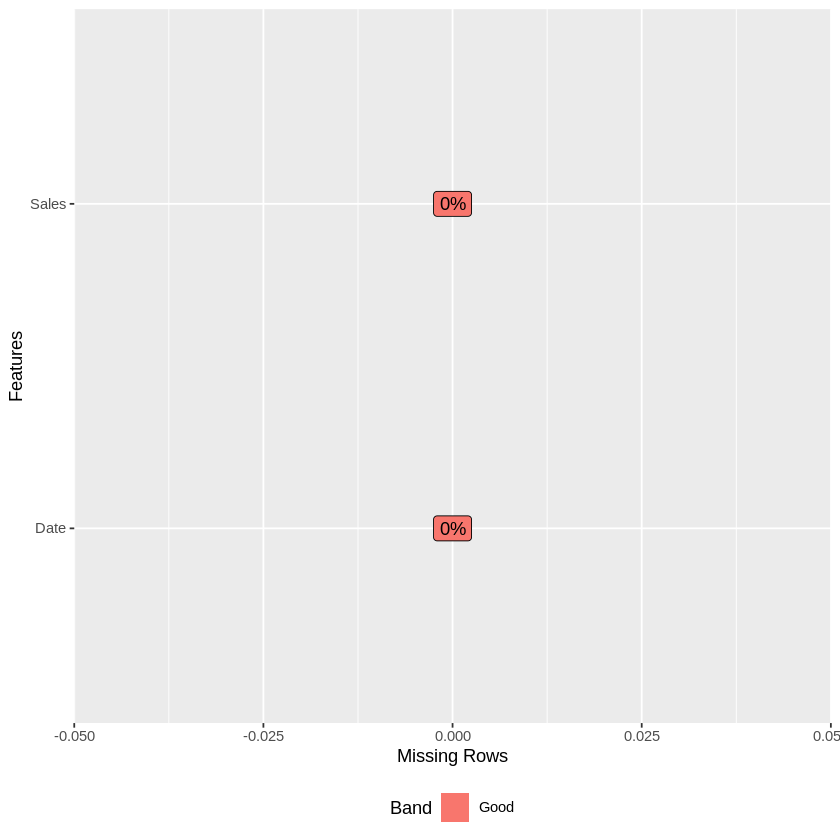

In [ ]:
# a visualization to show percentage of missing values in our data set
plot_missing(df)

No missing values

In [ ]:
# frequency of date
datee <- table(df$Date)
datee


 1/1/2019 1/10/2019 1/11/2019 1/12/2019 1/13/2019 1/14/2019 1/15/2019 1/16/2019 
       12         9         8        11        10        13        13        10 
1/17/2019 1/18/2019 1/19/2019  1/2/2019 1/20/2019 1/21/2019 1/22/2019 1/23/2019 
       11         9        16         8        10         8         7        17 
1/24/2019 1/25/2019 1/26/2019 1/27/2019 1/28/2019 1/29/2019  1/3/2019 1/30/2019 
       13        17        17        14        14        12         8         9 
1/31/2019  1/4/2019  1/5/2019  1/6/2019  1/7/2019  1/8/2019  1/9/2019  2/1/2019 
       14         6        12         9         9        18         8         6 
2/10/2019 2/11/2019 2/12/2019 2/13/2019 2/14/2019 2/15/2019 2/16/2019 2/17/2019 
       11         8         8         8         8        19         8        13 
2/18/2019 2/19/2019  2/2/2019 2/20/2019 2/21/2019 2/22/2019 2/23/2019 2/24/2019 
        7         9        14        10         6        11         8         9 
2/25/2019 2/26/2019 2/27/20

From the above frequency we observe that the most common date occurence is 2/15/2019 with a frequency of 19.  The lowest frequency is 6 with a number of dates.

Those who clicked on the ad and those who did not click on the ad are equal.

## 3. Tidying up the data.

In [ ]:
# change column names to lower case 
colnames(df) <- tolower(colnames(df))
# check to see if the change is successful
colnames(df)

[1] "date"  "sales"

In [ ]:
# convert date column to date data type
df$date <- as.Date(df$date, format = "%m/%d/%y")
str(df)

'data.frame':	1000 obs. of  2 variables:
 $ date : Date, format: "2020-01-05" "2020-03-08" ...
 $ sales: num  549 80.2 340.5 489 634.4 ...


In [ ]:
# check if there are any missing values
colSums(is.na(df))

date sales 
    0     0

In [ ]:
#df$date <- as.POSIXct(paste(df$date), format = "%m/%d/%Y")
str(df)

'data.frame':	1000 obs. of  2 variables:
 $ date : Date, format: "2020-01-05" "2020-03-08" ...
 $ sales: num  549 80.2 340.5 489 634.4 ...


In [ ]:
# check if there are any missing values
colSums(is.na(df))

date sales 
    0     0

In [ ]:
# copy date and sales from df
test =df[,c("date","sales")]
str(test)

'data.frame':	1000 obs. of  2 variables:
 $ date : Date, format: "2020-01-05" "2020-03-08" ...
 $ sales: num  549 80.2 340.5 489 634.4 ...


In [ ]:
# convert date to POCIXct type
test$date <- as.POSIXct(test$date)

In [ ]:
# confirm change was successful
str(test)

'data.frame':	1000 obs. of  2 variables:
 $ date : POSIXct, format: "2020-01-05" "2020-03-08" ...
 $ sales: num  549 80.2 340.5 489 634.4 ...


## 4. Anomally Detection.

In [ ]:
# load libraries
library(anomalize)
library(dplyr)
library(tibble)
df <- test %>% as.tibble()

Warning message:
“`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Converting from tbl_df to tbl_time.
Auto-index message: index = date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



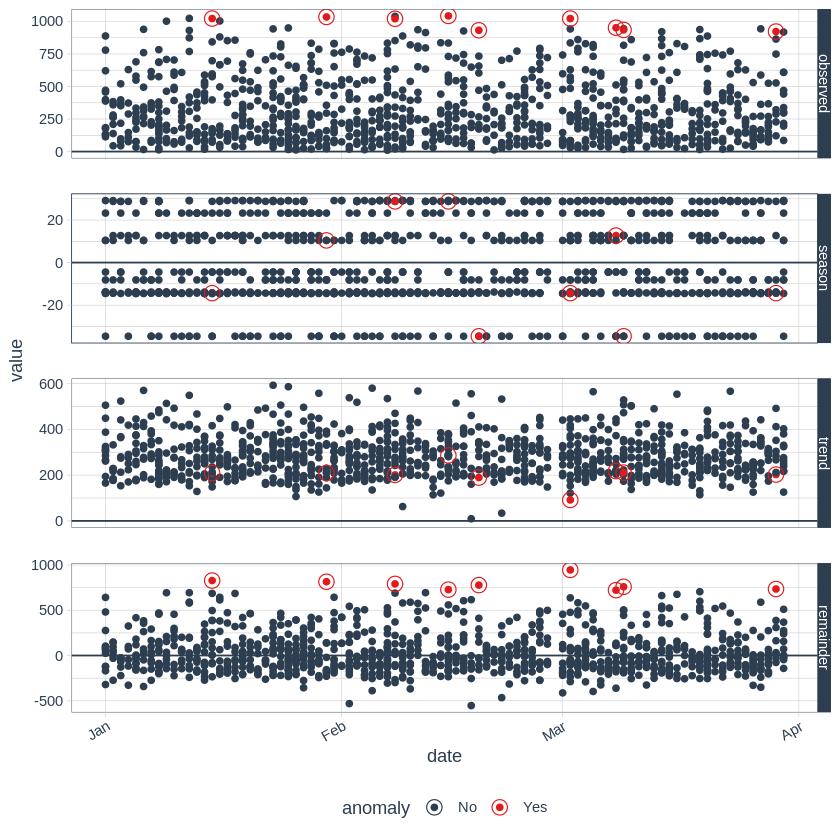

In [ ]:
# find and plot anomalies in the data
df %>%
  time_decompose(sales, method = "stl",  frequency = "auto", trend = "auto") %>%  
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.1) %>% 
  plot_anomaly_decomposition()

Converting from tbl_df to tbl_time.
Auto-index message: index = date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds



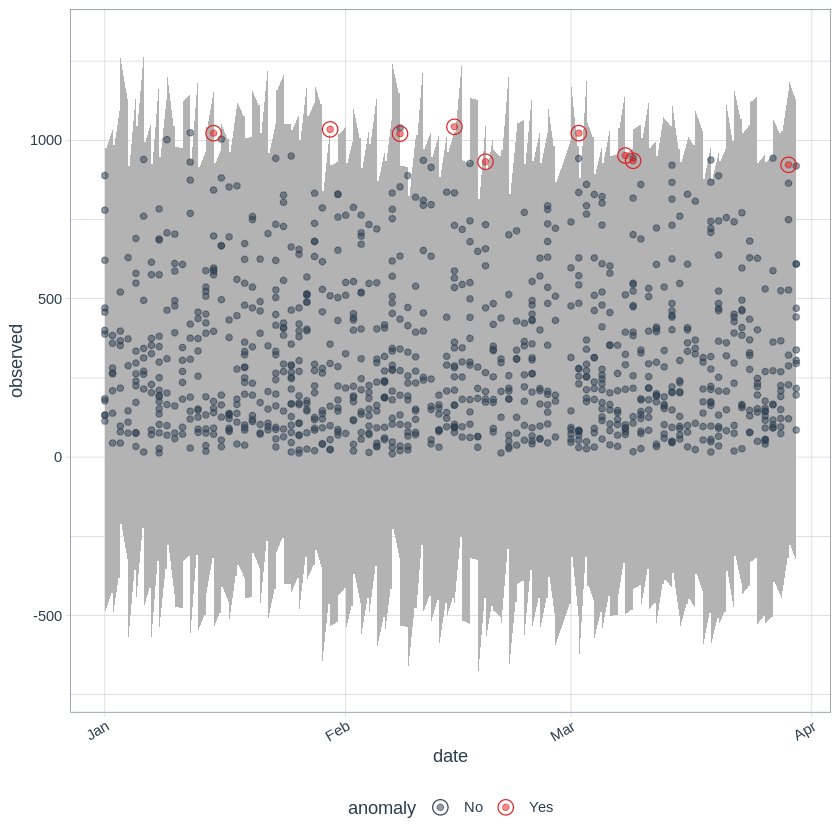

In [92]:
# plot the data again by recomposing the data
df %>% 
  time_decompose(sales, method = "stl",  frequency = "auto", trend = "auto") %>% 
  anomalize(remainder,  method = "gesd", alpha = 0.05, max_anoms = 0.1) %>%
  time_recompose() %>%  
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

We observe that the anomalies occur above the 750 mark. The rest shows the expected range for which the sales occupy.

In [87]:
# find the anomalies
df_anoms = df %>% 
  time_decompose(sales, method = "stl",  frequency = "auto", trend = "auto") %>%  
  anomalize(remainder,  method = "gesd", alpha = 0.05, max_anoms = 0.1) %>%  
  time_recompose() %>%  
  filter(anomaly == 'Yes')

Converting from tbl_df to tbl_time.
Auto-index message: index = date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds



In [88]:
# display the anomalies
df_anoms

date,observed,season,trend,remainder,remainder_l1,remainder_l2,anomaly,recomposed_l1,recomposed_l2
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2020-03-29,922.6350,-14.35919,202.50783,734.4864,-737.6286,714.2658,Yes,-549.4799,902.4144
2020-02-15,1042.6500,28.74450,286.02036,727.8851,-737.6286,714.2658,Yes,-422.8637,1029.0306
2020-02-08,1020.7050,28.74450,200.99541,790.9651,-737.6286,714.2658,Yes,-507.8886,944.0057
2020-03-08,951.8250,12.68236,217.46151,721.6811,-737.6286,714.2658,Yes,-507.4847,944.4096
2020-01-30,1034.4600,10.41401,209.27397,814.7720,-737.6286,714.2658,Yes,-517.9406,933.9538
2020-03-09,935.2665,-34.61636,211.01156,758.8713,-737.6286,714.2658,Yes,-561.2334,890.6610
2020-01-15,1022.3850,-14.35919,208.98314,827.7610,-737.6286,714.2658,Yes,-543.0046,908.8897
2020-02-19,932.3370,-34.61636,189.29105,777.6623,-737.6286,714.2658,Yes,-582.9539,868.9405
2020-03-02,1022.4900,-14.35919,91.57636,945.2728,-737.6286,714.2658,Yes,-660.4114,791.4829


## 5. Conclusion.

We make the following conclusions:
1. We were able to find anomalies within the data.
2. Based on different methods there is a possibility to dismiss the anomalies.

## 6. Recommendations.

We recommend the following:
1. Try different methods to detect anomalies.
2. Compile the anomalies that appear in all of the methods used. 


## 7. Follow up questions

Did we have the right data? **Yes**